In [1]:
from sklearn import datasets
iris = datasets.load_iris()
 
X = iris.data[0:100,0].reshape(-1,1)
y = iris.target[0:100]

In [2]:
# split the data into train and test datasets
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split (X, y)
 
# Using Logistic Regression Model
from sklearn import linear_model
 
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [3]:
from sklearn.metrics import roc_curve, auc
 
probabilities = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

Text(0.3, 0.8, 'ROC Curve')

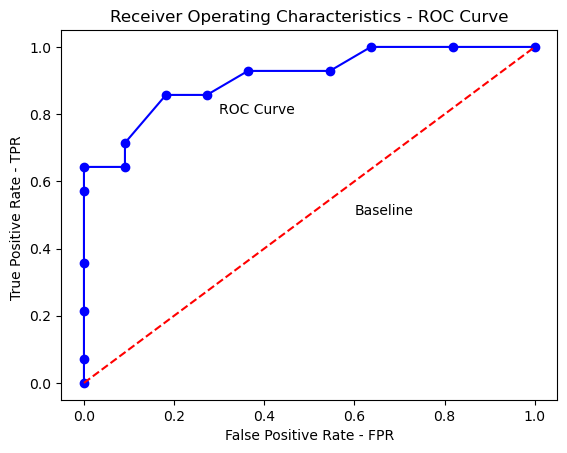

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(fpr,tpr,"o-b")
plt.plot([0,1],[0,1], "--r")
 
plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR ")
plt.title("Receiver Operating Characteristics - ROC Curve")
plt.text(0.6,0.5,"Baseline")
plt.text(0.3,0.8,"ROC Curve")

In [5]:
import pandas as pd
df_prob = pd.DataFrame({"sepal_length":X_test[:,0],
                 "class":y_test,
                 "prob": probabilities,
                 })

In [6]:
df_rate = pd.DataFrame({
                 "tpr": tpr,
                 "fpr": fpr,
                 "threshold":thresholds})

In [7]:
df_prob.sort_values(by=["sepal_length"], inplace = True)

In [8]:
df_rate=df_rate.sort_values(by = ["threshold"]).reset_index(drop = True)

In [9]:
df_rate

,tpr,fpr,threshold
0,1.000000,1.000000,0.001699
1,1.000000,0.818182,0.028313
2,1.000000,0.636364,0.048906
3,0.928571,0.545455,0.083197
4,0.928571,0.363636,0.220346
5,0.857143,0.272727,0.468139
6,0.857143,0.181818,0.608354
7,0.714286,0.090909,0.732710
8,0.642857,0.090909,0.828699
9,0.642857,0.000000,0.937758


In [10]:
df_prob

,sepal_length,class,prob
13,4.3,0,0.001699
24,4.7,0,0.016243
10,4.8,0,0.028313
0,4.8,0,0.028313
4,4.9,0,0.048906
3,4.9,1,0.048906
23,5.0,0,0.083197
6,5.1,0,0.138040
20,5.2,1,0.220346
9,5.2,0,0.220346
